Math 5750/6880: Mathematics of Data Science \
Project 2

# 1. Clustering Gaussian Blobs using $k$-means

In [61]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate 5 Gaussian blobs in 10 dimensions
X, y_true = make_blobs(
    n_samples=1000,
    centers=5,
    n_features=10,
    cluster_std=1.5,
    random_state=1)        # reproducibility
X = StandardScaler().fit_transform(X)

print(type(X),X.shape)
print(type(y_true),y_true.shape)

<class 'numpy.ndarray'> (1000, 10)
<class 'numpy.ndarray'> (1000,)


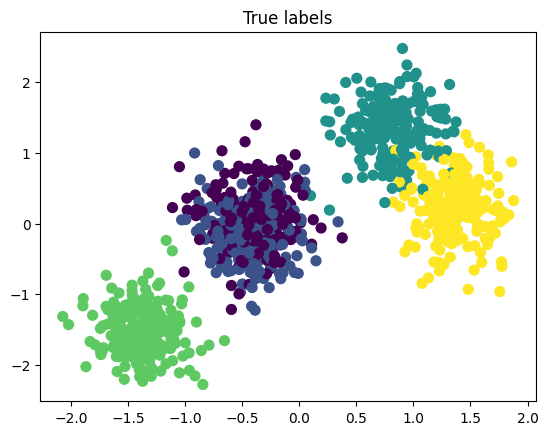

Smallest k-means Inertia Value = 761.8220157977858


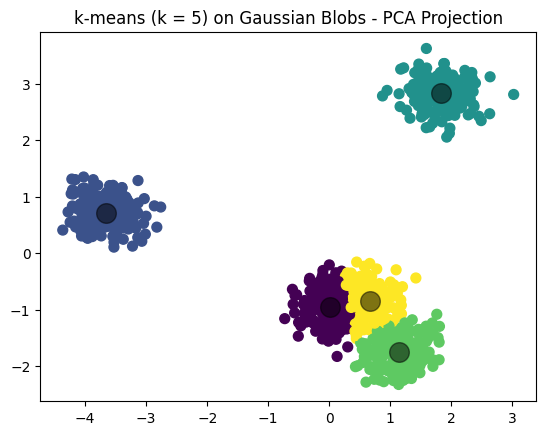

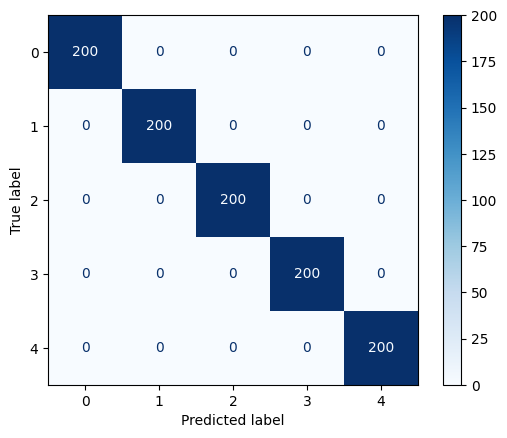

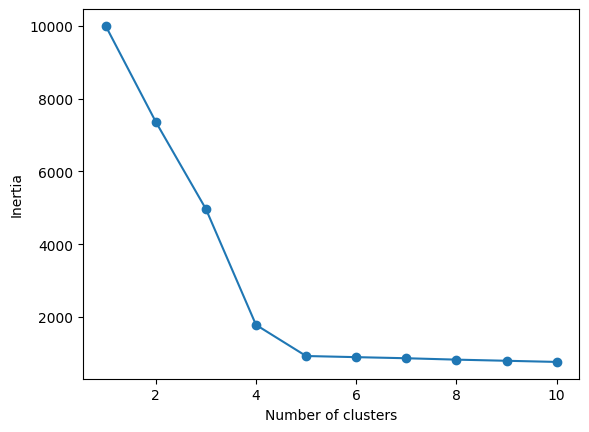

In [62]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.optimize import linear_sum_assignment
from sklearn.decomposition import PCA

#Graph of the Data
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y_true, s=50, cmap='viridis')
ax.set_title("True labels")
plt.show()

kmeans = KMeans(n_clusters=5, random_state=0, n_init='auto')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
cluster_centers = kmeans.cluster_centers_
kmeans_labels = kmeans.labels_

inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    inertia.append(kmeans.inertia_)
print("Smallest k-means Inertia Value =", min(inertia))

#PCA Visualization
pca = PCA(n_components=2) #Reduces the data to 2D so we can view it
X_pca = pca.fit_transform(X)
kmeans_pca = KMeans(n_clusters=5, random_state=0).fit(X_pca)
cluster_centers_pca = kmeans_pca.cluster_centers_
kmeans_labels_pca = kmeans_pca.labels_

plt.figure()
plt.title("k-means (k = 5) on Gaussian Blobs - PCA Projection")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels_pca, s=50, cmap='viridis')
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='black', s=200, alpha=0.5)
plt.show()

#Confusion Matrix with remapped data
cm = confusion_matrix(y_true, kmeans_labels)
row_ind, col_ind = linear_sum_assignment(-cm)
remapped_kmeans_labels = np.zeros_like(kmeans_labels)
for i in range(len(row_ind)):
    remapped_kmeans_labels[kmeans_labels == row_ind[i]] = col_ind[i]
final_cm = confusion_matrix(y_true, remapped_kmeans_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=final_cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()
#The data is perfectly matched because it is generated data

#Elbow
plt.figure()
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# 2. Clustering Fashion-MNIST using $k$-means

In [63]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST from OpenML
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
X, y = fetch_openml("Fashion-MNIST", version=1, as_frame=False, parser="auto", return_X_y=True)
y = y.astype(int)

print(type(X),X.shape)
print(type(y),y.shape)

<class 'numpy.ndarray'> (70000, 784)
<class 'numpy.ndarray'> (70000,)


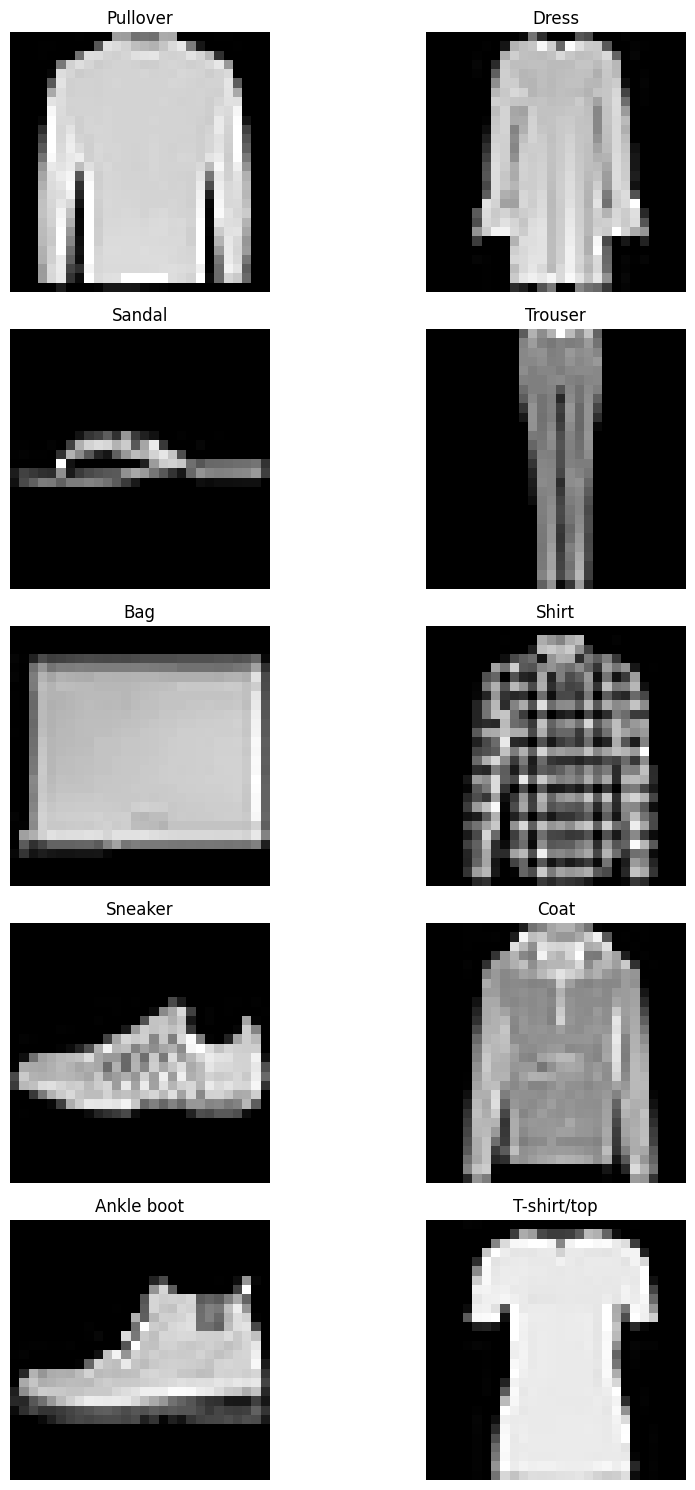

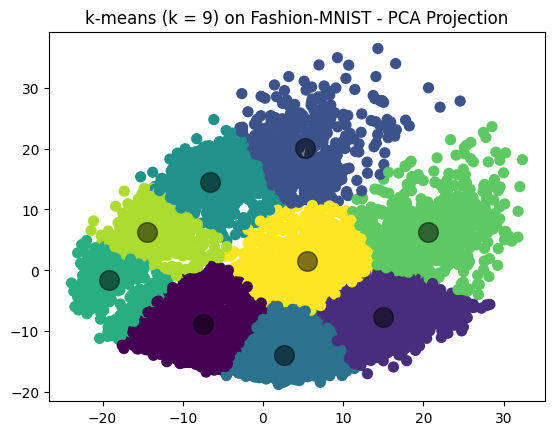

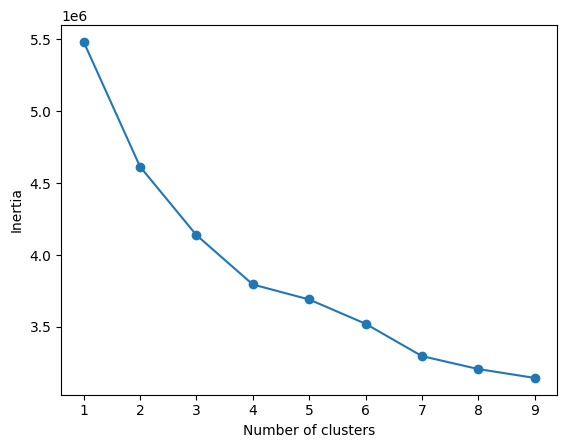

In [79]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.optimize import linear_sum_assignment
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

#Split the data into training and testing sets
X_90, X_10, y_90, y_10 = train_test_split(X, y, test_size=0.1)

#Graph of the Data

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
fig, ax = plt.subplots(5, 2, figsize=(10, 15))
ax = ax.flatten()

display_classes = set()
i = 0
j = 0

while i < 10:
  if y_10[j] not in display_classes:
    ax[i].imshow(X_10[j].reshape(28, 28), cmap='gray')
    ax[i].set_title(class_names[int(y_10[j])])
    ax[i].axis('off')
    display_classes.add(y_10[j])
    i += 1
  j += 1

plt.tight_layout()
plt.show()

# #Preprocessing
X_p = X_10 / 255.0
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_p)

#Clustering
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

pca = PCA(n_components=2) #Reduces the data to 2D so we can view it
X_pca = pca.fit_transform(X_scaled)
kmeans_pca = KMeans(n_clusters=9, random_state=0).fit(X_pca)
cluster_centers_pca = kmeans_pca.cluster_centers_
kmeans_labels_pca = kmeans_pca.labels_

plt.figure()
plt.title("k-means (k = 9) on Fashion-MNIST - PCA Projection")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels_pca, s=50, cmap='viridis')
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='black', s=200, alpha=0.5)
plt.show()

#Elbow

inertia = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    inertia.append(kmeans.inertia_)
#print("Smallest k-means Inertia Value =", min(inertia))

plt.figure()
plt.plot(range(1,10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# 3. Dimensionality reduction for Fashion-MNIST

In [ ]:
# your code here

# 4. Clustering Fashion-MNIST using spectral clustering

In [ ]:
# your code here